In [1]:
from keras.datasets import reuters
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [2]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1.
  return results
train_data = vectorize_sequences(train_data)
test_data = vectorize_sequences(test_data)

In [3]:
from keras.utils import to_categorical

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

## Building the network

In [4]:
from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [6]:
train_data_val = train_data[:1000]
train_data = train_data[1000:]

train_labels_val = train_labels[:1000]
train_labels = train_labels[1000:]

In [7]:
history = model.fit(train_data, train_labels, epochs=20, batch_size=512, validation_data=(train_data_val, train_labels_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step - accuracy: 0.3407 - loss: 3.3822 - val_accuracy: 0.6250 - val_loss: 2.0225
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.6569 - loss: 1.7871 - val_accuracy: 0.6830 - val_loss: 1.4291
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 90ms/step - accuracy: 0.7217 - loss: 1.3023 - val_accuracy: 0.7250 - val_loss: 1.2205
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7690 - loss: 1.0491 - val_accuracy: 0.7650 - val_loss: 1.0995
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - accuracy: 0.8214 - loss: 0.8467 - val_accuracy: 0.7560 - val_loss: 1.0707
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - accuracy: 0.8387 - loss: 0.7350 - val_accuracy: 0.7930 - val_loss: 0.9570
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8657 - loss: 0.6172 - val_accuracy: 0.7920 - val_loss: 0.9345
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - accuracy: 0.8901 - loss: 0.5056 - val_accuracy: 0.7960 - v

## plotting the result

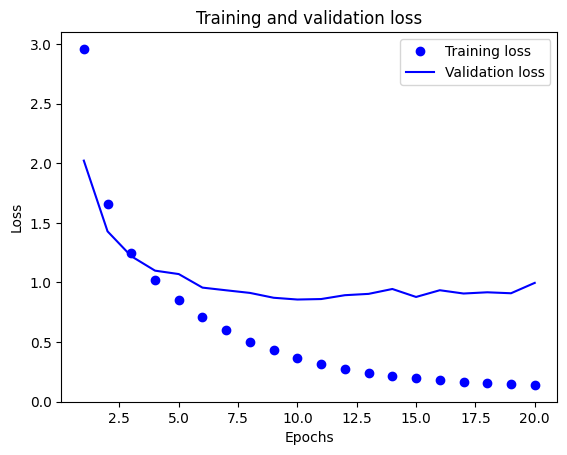

In [8]:
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

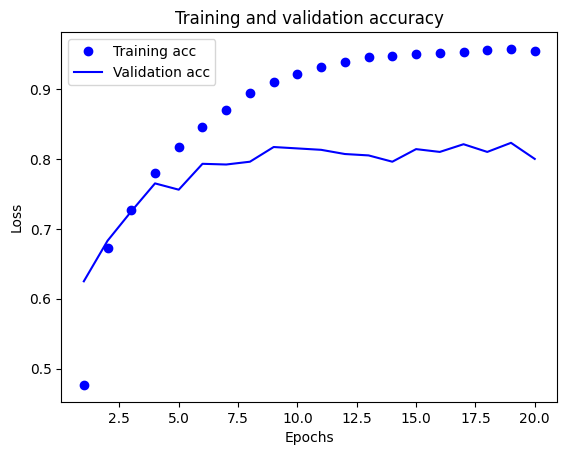

In [9]:
plt.clf()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## Making a new network to avoid over_fitting

In [15]:
model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(train_data,
train_labels,
epochs=9,
batch_size=512,
validation_data=(train_data_val, train_labels_val))
results = model.evaluate(test_data, test_labels)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.4040 - loss: 3.0733 - val_accuracy: 0.5780 - val_loss: 1.7321
Epoch 2/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 92ms/step - accuracy: 0.6384 - loss: 1.5471 - val_accuracy: 0.6730 - val_loss: 1.3632
Epoch 3/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.7342 - loss: 1.1720 - val_accuracy: 0.7430 - val_loss: 1.1587
Epoch 4/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - accuracy: 0.8002 - loss: 0.9237 - val_accuracy: 0.7390 - val_loss: 1.1197
Epoch 5/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 4s 141ms/step - accuracy: 0.8329 - loss: 0.7588 - val_accuracy: 0.7780 - val_loss: 1.0342
Epoch 6/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 77ms/step - accuracy: 0.8668 - loss: 0.5977 - val_accuracy: 0.8030 - val_loss: 0.9343
Epoch 7/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 77ms/step - accuracy: 0.8921 - loss: 0.4795 - val_accuracy: 0.7830 - val_loss: 0.9943
Epoch 8/9
16/16 ━━━━━━━━━━━━━━━━━━━━ 3s 78ms/step - accuracy: 0.9077 - loss: 0.4220 - val_accuracy: 0.8010 - val_los

In [13]:
predictions = model.predict(test_data)

predictions[0].shape

71/71 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


(46,)

In [14]:
print(np.argmax(predictions[0]))

3
